## Figure 4

In [1]:
# load & install packages
library("pacman")
p_load_gh("paul-buerkner/brms", "reispat/lazerhawk", "anthonynorth/rscodeio", update=FALSE)
p_load("tidyverse", "tidybayes", "car", "pastecs", "lme4", "lmerTest", 
       "sjPlot", "MASS", "nlme", "reshape2", "interplot", "ggpubr", "scales", "RColorBrewer", "ggmcmc", "ggthemes", 
       "ggridges", "ggpubr", "devtools", "ggeffects", "mice", "dplyr", "ggplot2", "readr", "svglite", "grid", 
       "lazerhawk", "gridSVG", "tinytex", "mousetrap", "easystats", "ltm", "misty", update=FALSE)
warnings()

# load & configure rstan, brms & loo
library("rstan")
options(mc.cores=parallel::detectCores())
mc.cores = parallel::detectCores()
rstan_options(auto_write=TRUE)
library("brms")
library("loo")

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘rstan’


The following object is masked from ‘package:arm’:

    traceplot


The following object is masked from ‘package:pastecs’:

    extract


The following object is masked from ‘package:tidyr’:

    extract


This is loo version 2.5.1

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 


Attaching package: ‘loo’


The following ob

In [2]:
# load data
ds_add_val_df <- read.csv("./data/bayes/ds_add_val_df.csv")
ds_add_val_df$subject_id <- as.factor(ds_add_val_df$subject_id)
ds_add_val_df$distractor <- as.factor(ds_add_val_df$distractor)

# z-score variables
ds_add_val_df$add_val_avg_perc_z = scale(ds_add_val_df$add_val_avg_perc, center=TRUE, scale=TRUE)
ds_add_val_df$perf_mask_z = scale(ds_add_val_df$perf_mask, center=TRUE, scale=TRUE)
ds_add_val_df$diff_mask_z = scale(ds_add_val_df$diff_mask, center=TRUE, scale=TRUE)
ds_add_val_df$mot_mask_z = scale(ds_add_val_df$mot_mask, center=TRUE, scale=TRUE)
ds_add_val_df$performance_z = scale(ds_add_val_df$performance, center=TRUE, scale=TRUE)
ds_add_val_df$difficulty_z = scale(ds_add_val_df$difficulty, center=TRUE, scale=TRUE)
ds_add_val_df$motivation_z = scale(ds_add_val_df$motivation, center=TRUE, scale=TRUE)

In [3]:
# calculate models (mask)
# performance ~ benefit of lip movements
model_mask_perf <- brm(perf_mask ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_mask_perf_z <- brm(perf_mask_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
# difficulty ~ benefit of lip movements
model_mask_diff <- brm(diff_mask ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_mask_diff_z <- brm(diff_mask_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

# motivation ~ benefit of lip movements
model_mask_mot <- brm(mot_mask ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
model_mask_mot_z <- brm(mot_mask_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



In [4]:
# show models (mask)
print("performance (mask) ~ benefit of lip movements")
brms_SummaryTable(model_mask_perf, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_mask_perf_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("difficulty (mask) ~ benefit of lip movements")
brms_SummaryTable(model_mask_diff, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_mask_diff_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("motivation (mask) ~ benefit of lip movements")
brms_SummaryTable(model_mask_mot, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_mask_mot_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

[1] "performance (mask) ~ benefit of lip movements"


| Covariate        | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:-----------------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept        |    69.36 |      2.54 |    65.34 |    73.41 |    100.00 |            Inf |    *    |
| add_val_avg_perc |    -0.35 |      0.17 |    -0.62 |    -0.07 |      2.18 |           0.02 |    *    |



| Covariate          | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:-------------------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept          |     0.03 |      0.15 |    -0.21 |     0.26 |     57.40 |           1.35 |         |
| add_val_avg_perc_z |    -0.27 |      0.14 |    -0.49 |    -0.06 |      2.21 |           0.02 |    *    |

[1] "difficulty (mask) ~ benefit of lip movements"


| Covariate        | Estimate | Est.Error

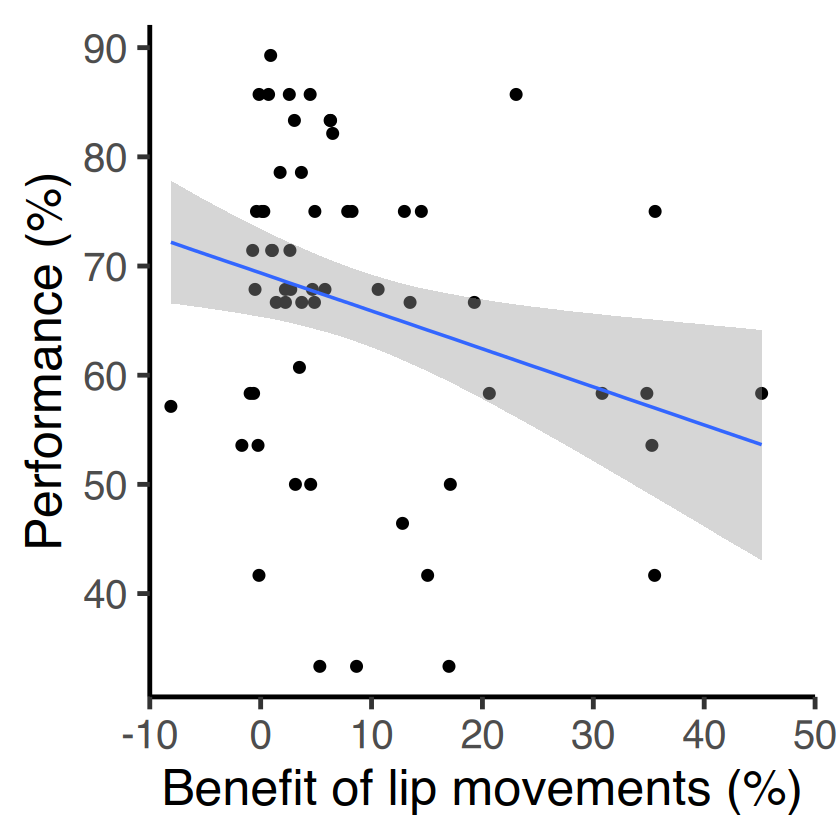

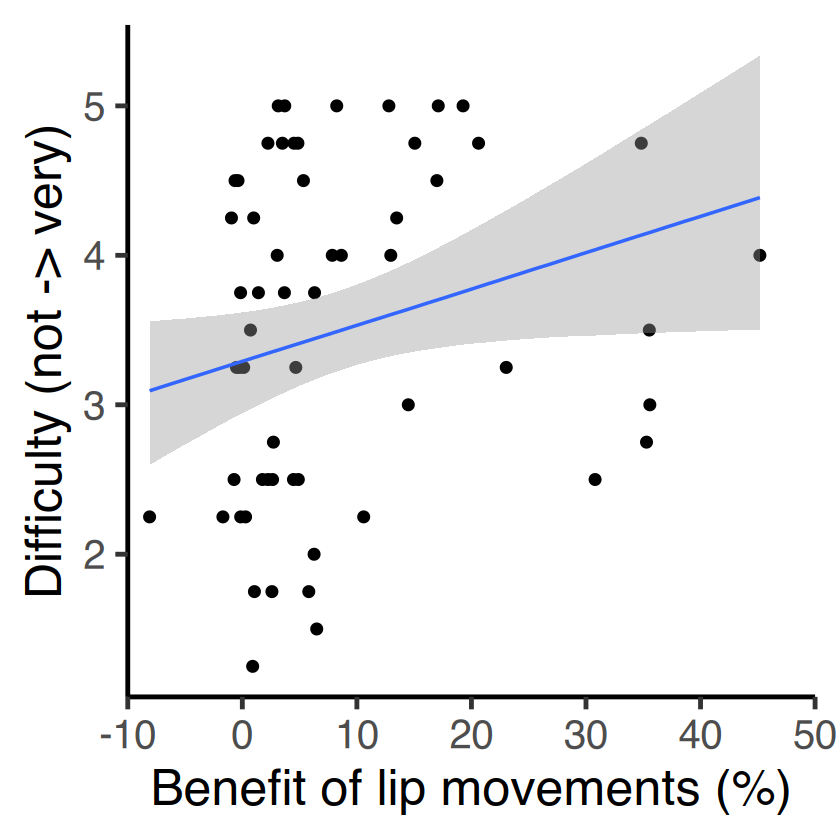

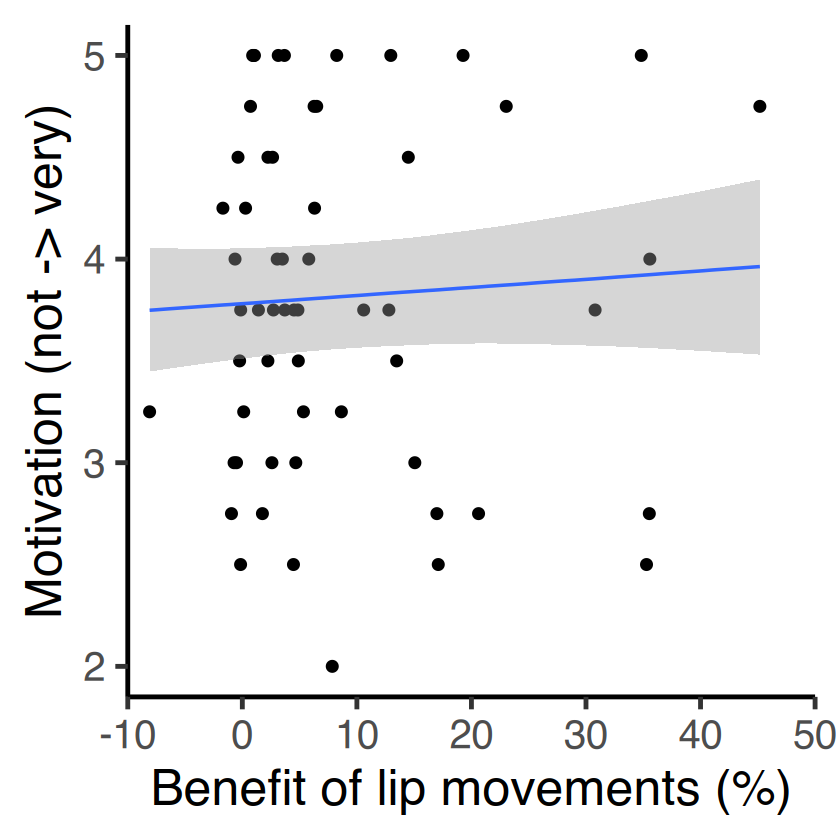

In [18]:
# plot models (mask)
# performance
c_eff_perf_mask <- plot(conditional_effects(model_mask_perf, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_perf_mask_plot <- c_eff_perf_mask[[1]] + xlab("Benefit of lip movements (%)") + ylab("Performance (%)") +
  theme_classic(base_size=30) +
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50))
  c_eff_perf_mask_plot

# difficulty
c_eff_diff_mask <- plot(conditional_effects(model_mask_diff, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_diff_mask_plot <- c_eff_diff_mask[[1]] + xlab("Benefit of lip movements (%)") + ylab("Difficulty (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50)) 
  c_eff_diff_mask_plot

# motivation
c_eff_mot_mask <- plot(conditional_effects(model_mask_mot, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_mot_mask_plot <- c_eff_mot_mask[[1]] + xlab("Benefit of lip movements (%)") + ylab("Motivation (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50))
  c_eff_mot_mask_plot

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Using the `size` aesthietic with geom_segment was deprecated in ggplot2 3.4.0.
ℹ Please use the `linewidth` aesthetic instead.”


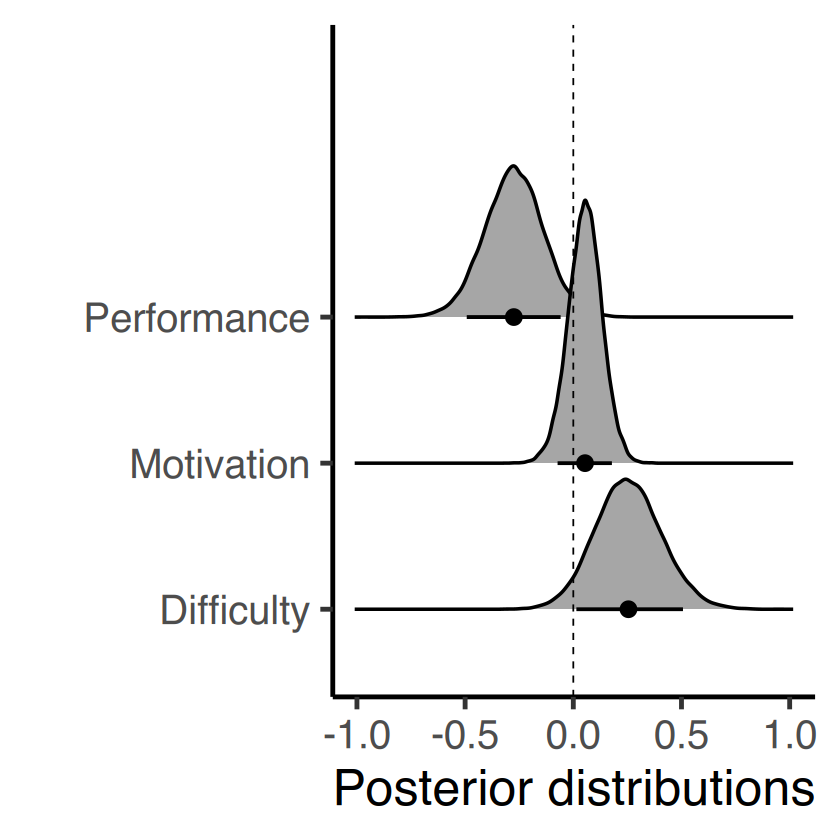

In [10]:
# plot posterior distributions (mask)
post_mask_perf <- posterior_samples(model_mask_perf_z)
post_mask_diff <- posterior_samples(model_mask_diff_z)
post_mask_mot <- posterior_samples(model_mask_mot_z)

# merge all posteriors to dataframe
posteriors_mask <- bind_rows(post_mask_perf, post_mask_diff, post_mask_mot) %>% 
  mutate(priors = c("Performance", "Difficulty", "Motivation") 
         %>% rep(., each = length(post_mask_perf$b_add_val_avg_perc)))

# plot all posteriors
posteriors_mask_plot <- ggplot(data=posteriors_mask, aes(x = b_add_val_avg_perc_z, y = priors)) + 
  stat_halfeye(height=2, width=60, slab_color="black", expand=TRUE, trim=FALSE, .width=0.89, point_interval = "mean_qi", 
               point_size=4, interval_size=4) + theme_classic(base_size=30) + 
  geom_vline(xintercept=0, linetype="dashed") + xlab("Posterior distributions") + ylab("")
posteriors_mask_plot

In [11]:
# calculate models (no mask)
# performance ~ benefit of mask movements
model_nm_perf <- brm(performance ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_nm_perf_z <- brm(performance_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
# difficulty ~ benefit of mask movements
model_nm_diff <- brm(difficulty ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_nm_diff_z <- brm(difficulty_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

# motivation ~ benefit of mask movements
model_nm_mot <- brm(motivation ~ 1 + add_val_avg_perc + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
model_nm_mot_z <- brm(motivation_z ~ 1 + add_val_avg_perc_z + (1 | subject_id),
                      data=ds_add_val_df, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [12]:
# show models (no mask)
print("performance (no mask) ~ benefit of lip movements")
brms_SummaryTable(model_nm_perf, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_nm_perf_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("difficulty (no mask) ~ benefit of lip movements")
brms_SummaryTable(model_nm_diff, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_nm_diff_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("motivation (no mask) ~ benefit of lip movements")
brms_SummaryTable(model_nm_mot, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_nm_mot_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

[1] "performance (no mask) ~ benefit of lip movements"


| Covariate        | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:-----------------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept        |    69.12 |      2.68 |    64.89 |    73.41 |       100 |            Inf |    *    |
| add_val_avg_perc |    -0.06 |      0.18 |    -0.36 |     0.22 |        36 |           0.56 |         |



| Covariate          | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:-------------------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept          |     0.02 |      0.15 |    -0.22 |     0.26 |     55.71 |           1.26 |         |
| add_val_avg_perc_z |    -0.05 |      0.14 |    -0.28 |     0.17 |     36.09 |           0.56 |         |

[1] "difficulty (no mask) ~ benefit of lip movements"


| Covariate        | Estimate | Est

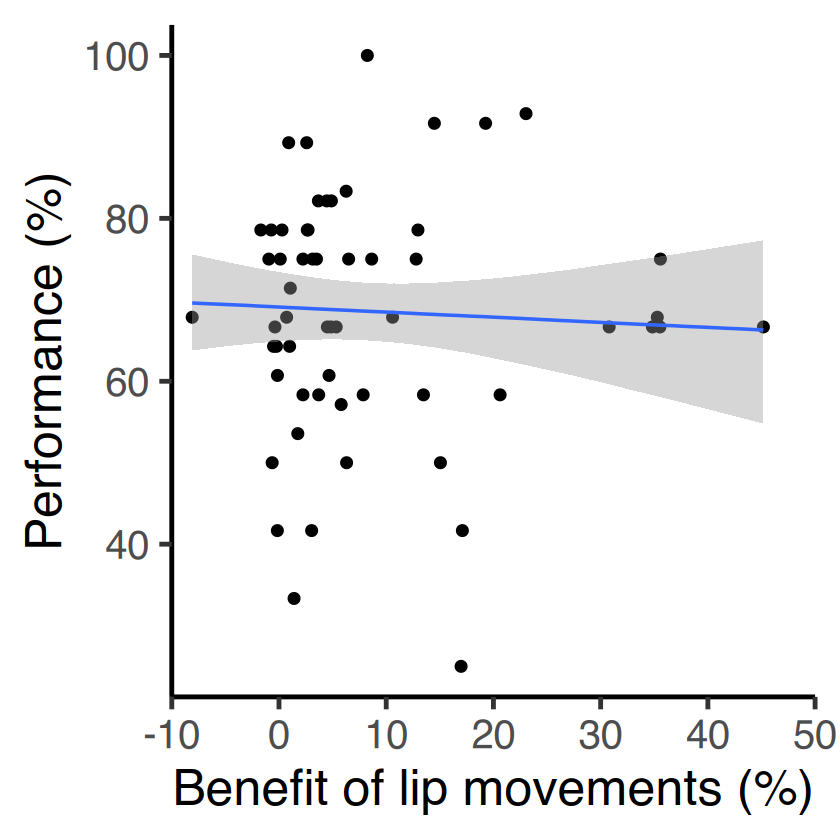

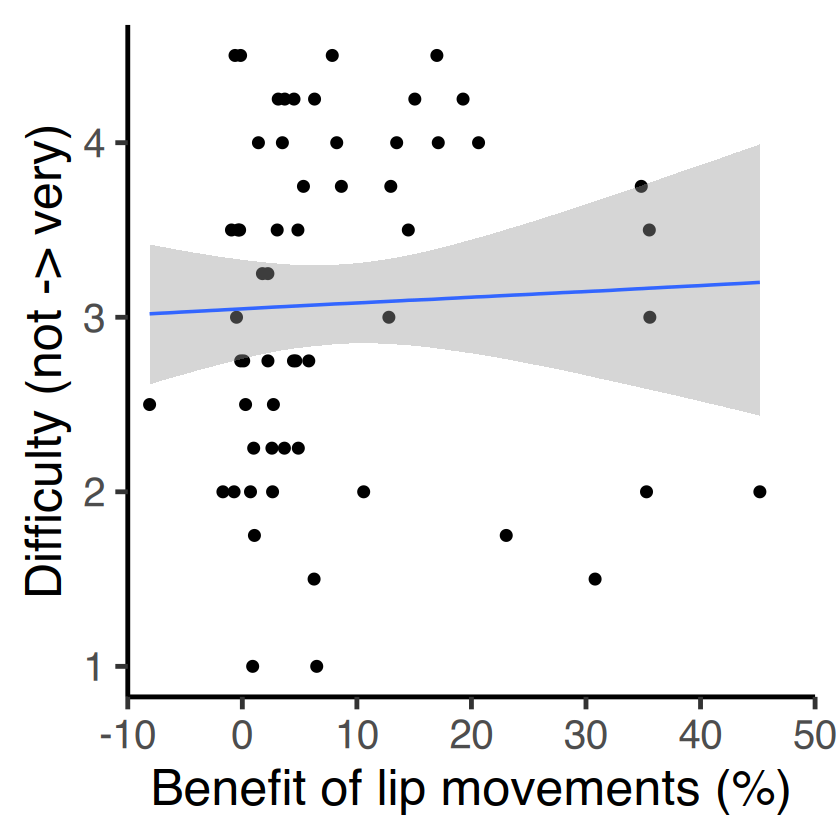

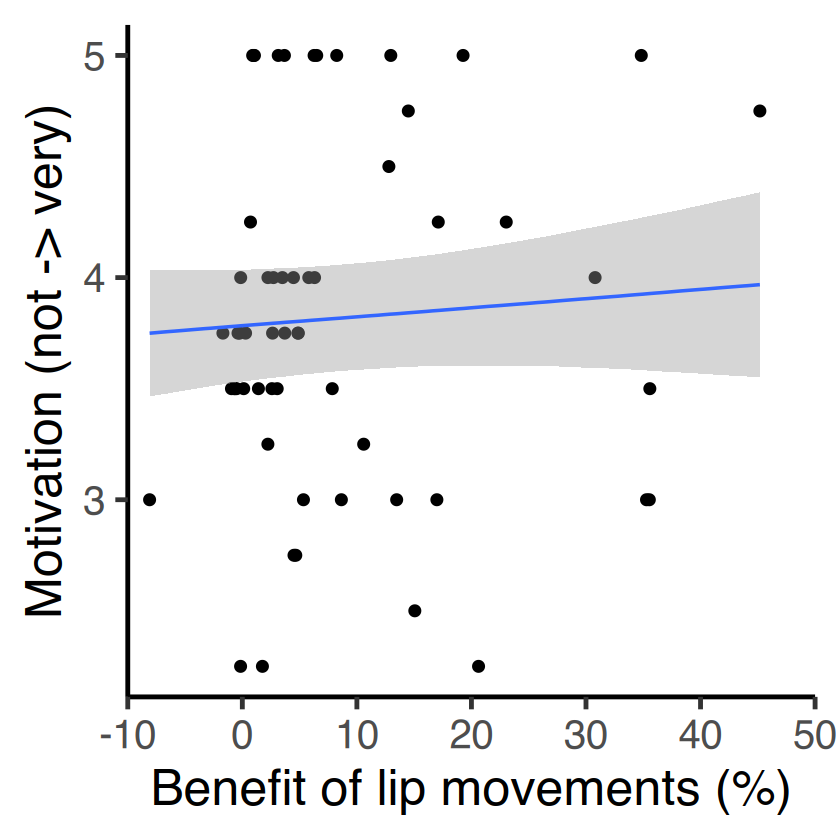

In [16]:
# plot models (no mask)
# performance
c_eff_perf_nm <- plot(conditional_effects(model_nm_perf, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_perf_nm_plot <- c_eff_perf_nm[[1]] + xlab("Benefit of lip movements (%)") + ylab("Performance (%)") +
  theme_classic(base_size=30) +
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50))
c_eff_perf_nm_plot

# difficulty
c_eff_diff_nm <- plot(conditional_effects(model_nm_diff, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_diff_nm_plot <- c_eff_diff_nm[[1]] + xlab("Benefit of lip movements (%)") + ylab("Difficulty (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50))
c_eff_diff_nm_plot

# motivation
c_eff_mot_nm <- plot(conditional_effects(model_nm_mot, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_mot_nm_plot <- c_eff_mot_nm[[1]] + xlab("Benefit of lip movements (%)") + ylab("Motivation (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-10, 50))
  c_eff_mot_nm_plot

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


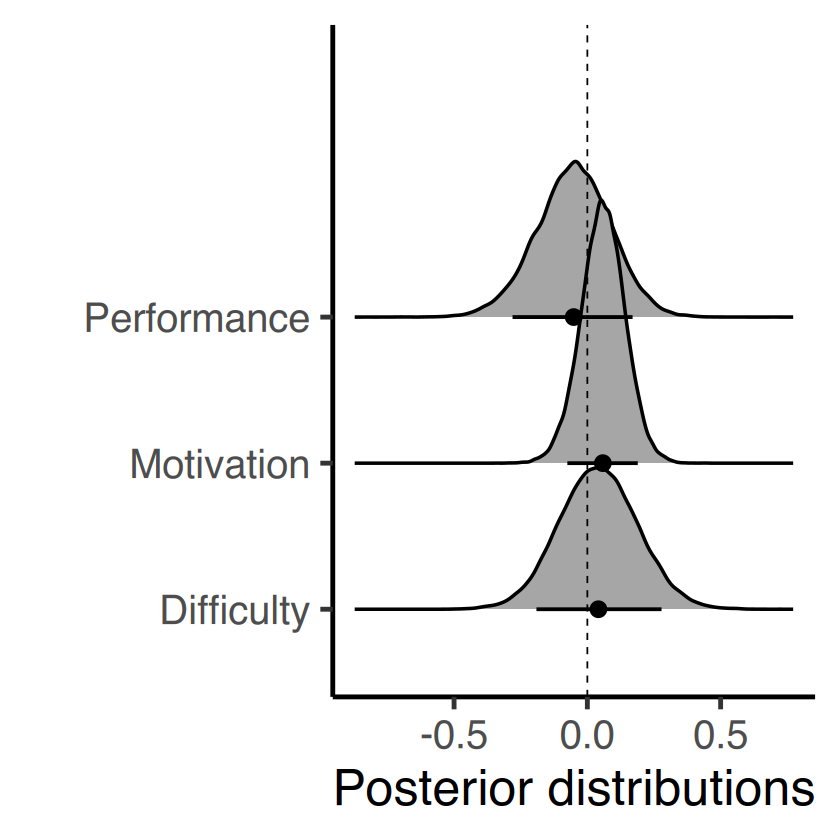

In [17]:
# plot posterior distributions (no mask)
post_nm_perf <- posterior_samples(model_nm_perf_z)
post_nm_diff <- posterior_samples(model_nm_diff_z)
post_nm_mot <- posterior_samples(model_nm_mot_z)

# merge all posteriors to dataframe
posteriors_nm <- bind_rows(post_nm_perf, post_nm_diff, post_nm_mot) %>% 
  mutate(priors = c("Performance", "Difficulty", "Motivation") 
         %>% rep(., each = length(post_nm_perf$b_add_val_avg_perc)))

# plot all posteriors
posteriors_nm_plot <- ggplot(data=posteriors_nm, aes(x = b_add_val_avg_perc_z, y = priors)) + 
  stat_halfeye(height=2, width=60, slab_color="black", expand=TRUE, trim=FALSE, .width=0.89, point_interval = "mean_qi", 
               point_size=4, interval_size=4) + theme_classic(base_size=30) + 
  geom_vline(xintercept=0, linetype="dashed") + xlab("Posterior distributions") + ylab("")
posteriors_nm_plot